# Easy

In [297]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import glob

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

In [275]:
df = pd.read_csv('car/bmw.csv') # Прочитали BMW

In [276]:
display(df) # Поймём, какие числовые признаки.

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


In [277]:
numerical_signs = ['year', 'mileage', 'tax', 'mpg', 'engineSize'] # Выделили числовые в списке

In [278]:
x_train, x_test, y_train, y_test = train_test_split(df[numerical_signs], df['price'], train_size=0.8, random_state=42) 
# жизнь, вселенная и все такое

In [279]:
model = DecisionTreeClassifier(max_depth=10) # Чем больше глубина - переобучение.
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [280]:
train_prediction = model.predict(x_train)
test_prediction = model.predict(x_test)

train_f2 = r2_score(train_prediction, y_train)
test_f2 = r2_score(test_prediction, y_test)

print('Точность на обучающей выборке: ', train_f2)
print('Точность на тестовой выборке: ', test_f2)

Точность на обучающей выборке:  0.6285485941395355
Точность на тестовой выборке:  0.5847511973088051


In [281]:
model.feature_importances_

array([0.09634566, 0.49162448, 0.08158568, 0.29160678, 0.0388374 ])

Самый важный признак - mileage.

Как модель принимает решения

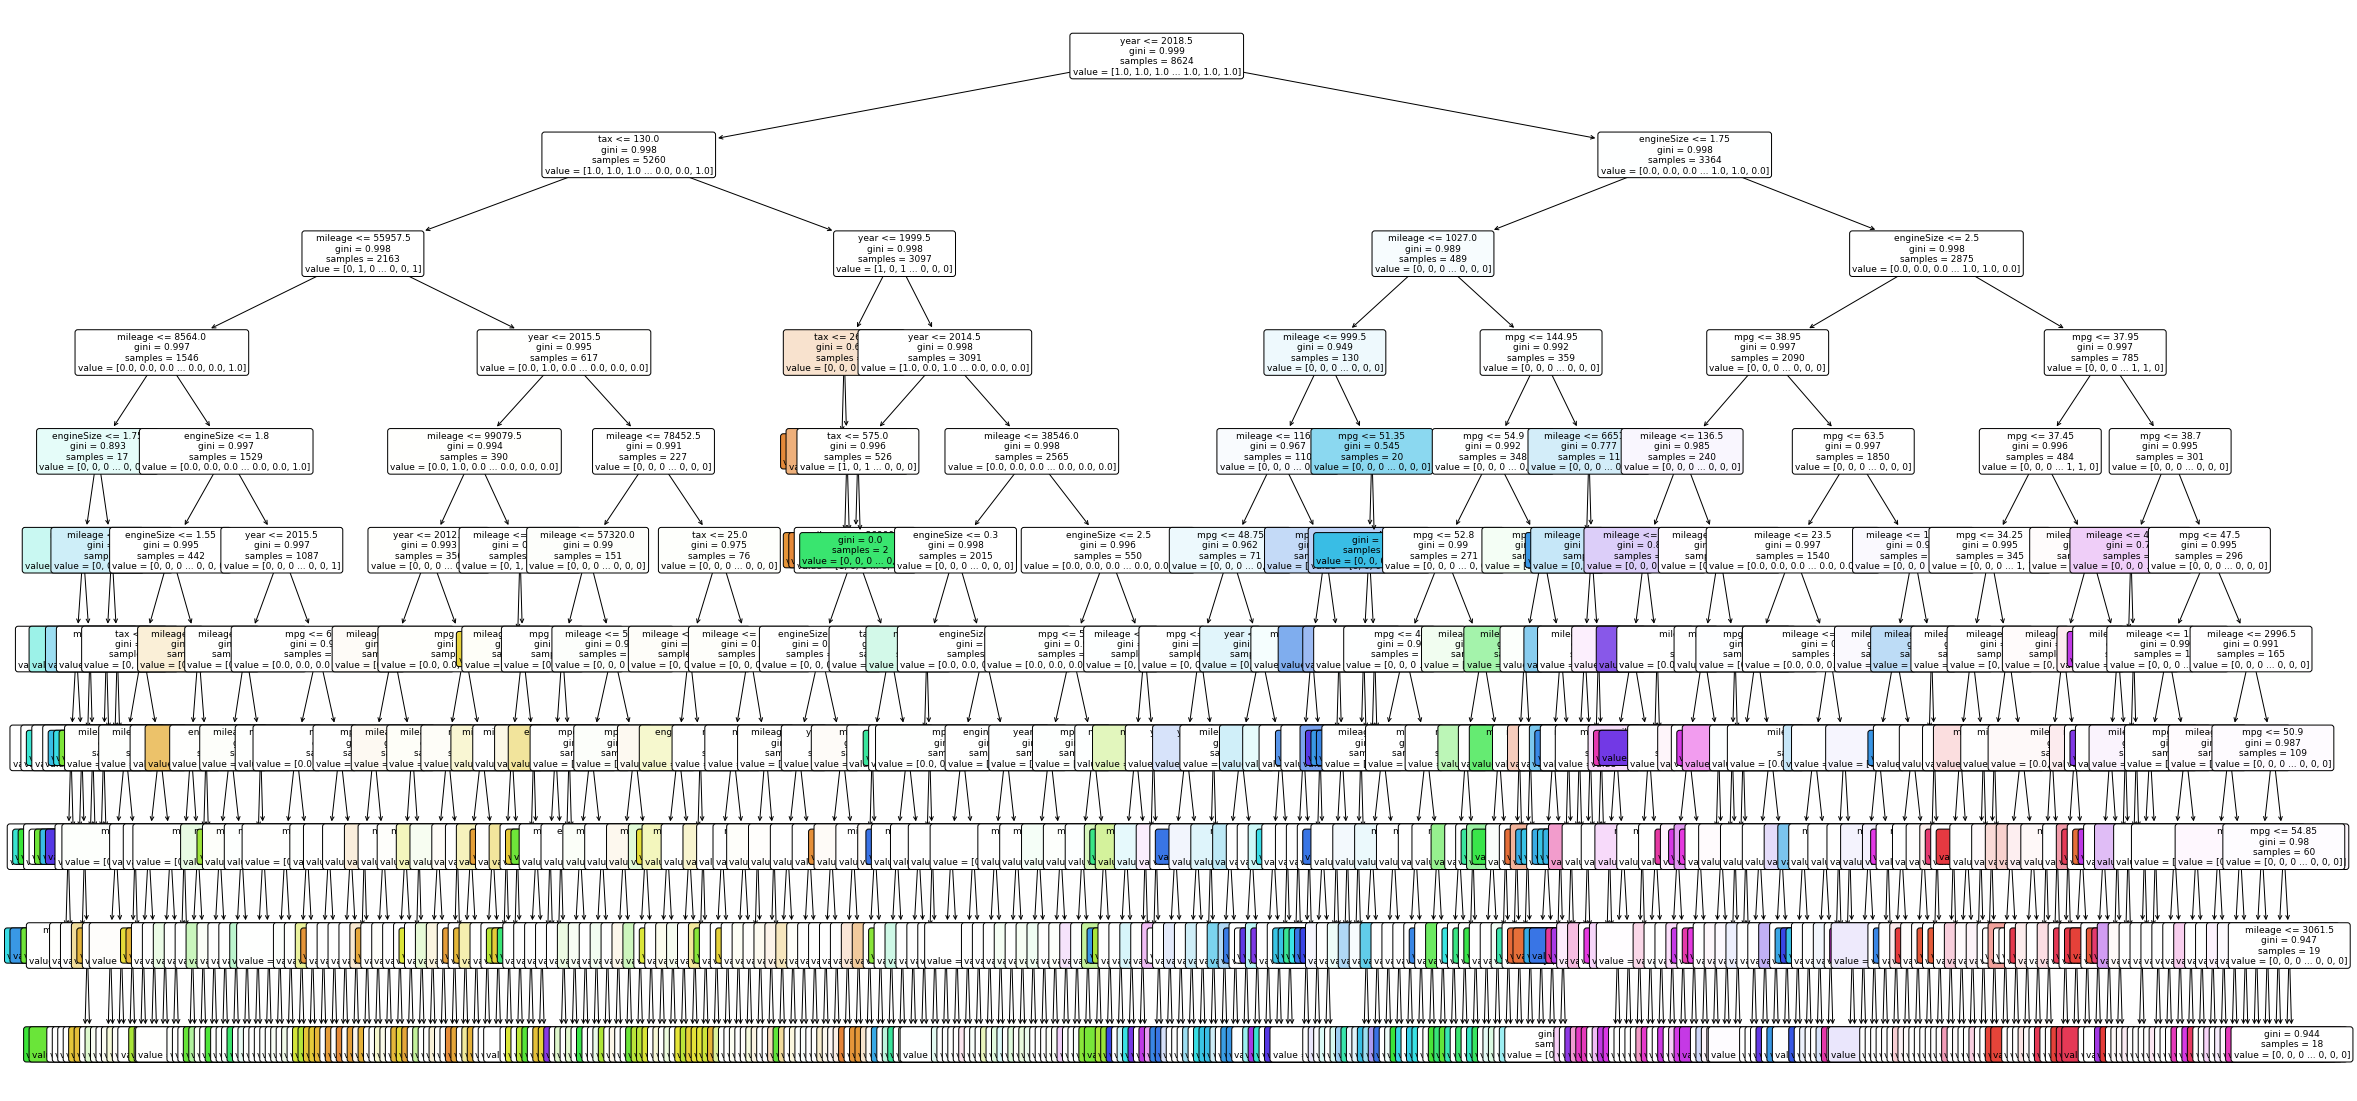

In [282]:
plt.figure(figsize=(40,20))  
plot_tree(model, feature_names = numerical_signs, 
             filled=True, fontsize=9, rounded = True)
plt.show()


# Normal

Принял решение не использовать файлы unclean_cclass.csv и unclean_focus.csv

In [283]:
PATH = 'car/'
filenames = glob.glob(PATH + "/*.csv")
filenames.pop(6)
filenames.pop(10)
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))
big_frame = pd.concat(dfs, ignore_index=True)
tmp = big_frame.columns
big_frame.drop(tmp[-1], axis=1)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Corsa,2018,7885,Manual,9876,Petrol,145.0,55.4,1.4
1,Corsa,2019,11995,Manual,2500,Petrol,145.0,54.3,1.4
2,Corsa,2017,9777,Automatic,9625,Petrol,145.0,47.9,1.4
3,Corsa,2016,8500,Manual,25796,Petrol,30.0,55.4,1.4
4,Corsa,2019,10000,Manual,3887,Petrol,145.0,43.5,1.4
...,...,...,...,...,...,...,...,...,...
108535,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0
108536,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2
108537,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4
108538,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2


Категориальные признаки у нас model, transmission, fuelType. Преобразуем с помощью OneCodeEncoder

In [284]:
from sklearn.preprocessing import LabelEncoder

In [285]:
strg = ['model', 'transmission', 'fuelType']

In [286]:
data_x = df[strg]
data_y = df['price']
data_x = data_x.apply(LabelEncoder().fit_transform)

In [287]:
data_x

,model,transmission,fuelType
0,4,0,0
1,5,0,4
2,4,0,0
3,0,0,0
4,6,0,0
...,...,...,...
10776,15,0,0
10777,4,0,0
10778,2,1,4
10779,0,0,0


In [288]:
data_y

0        11200
1        27000
2        16000
3        12750
4        14500
         ...  
10776    19000
10777    14600
10778    13100
10779     9930
10780    15981
Name: price, Length: 10781, dtype: int64

In [289]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, train_size=0.8, random_state=42)

In [290]:
from sklearn.model_selection import GridSearchCV

In [298]:
params = {
    "criterion": ('poisson', 'friedman_mse', 'squared_error', 'absolute_error'),
    'max_depth': list(range(5, 15))
}

In [299]:
search = GridSearchCV(
    DecisionTreeRegressor(),
    params,
)
search.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ('poisson', 'friedman_mse',
                                       'squared_error', 'absolute_error'),
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]})

In [307]:
best_score = search.best_score_

In [308]:
best_score

0.6214777419835512

In [309]:
best_estimator = search.best_estimator_

In [310]:
best_estimator

DecisionTreeRegressor(criterion='friedman_mse', max_depth=9)